# ***GÖĞÜS KANSERİ ANALİZİ***

> Göğüs kanseri dünyada kadınlar arasında en sık görülen kanser çeşididir. Tüm kanser vakalarının yaklaşık olarak %25'ini oluşturmaktadır.

> Göğüsteki hücrelerin kontrolden çıkmaya başlamasıyla başlar. Bu hücreler genellikle röntgende görülebilen veya göğüs bölgesinde kitleler halinde hissedilen tümörlerden oluşmaktadır.

> Tespitinin önündeki en önemli zorluk, tümörlerin kötü huylu (Malignant) veya iyi huylu (Benign) olarak nasıl sınıflandırılacağıdır. 


> Proje kapsamında çeşitli algoritmalar kullanılarak bu tümörler iyi ya da kötü huylu olarak sınıflandırılmıştır.



![cancer.JPG](https://media.istockphoto.com/id/484221832/tr/foto%C4%9Fraf/doctor-examining-x-ray.jpg?s=612x612&w=0&k=20&c=q-zyRuT2b_FQx40TDiuFHA-DBBkZV-YrJEKd7EKNIjk= )



##  Analiz İçeriği
 1. [Phyton Kütüphaneleri](#1)
 1. [Veri Okuma Ve Analiz Etme](#2)
 1. [Değişken Analizi](#3)
 1. [scatter plot](#4)
 1. [Korelasyon Analizi](#5)
 1. [Pair Plot Gösterimi](#6)
 1. [Özellik Dağılımı Histogramı](#7)
 1. [Ön işleme: Tren-Test Ayırma ve Normalizasyon](#8)
 1. [Modelleme](#9)

In [4]:
# Uyarıları Mesajlarını Düzenlemek İçin :
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
## Phyton Kütüphaneleri

In [5]:
# Temel kütüphaneler :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import pickle

from time import time

#Projemde İhtiyacım Olacak Paketler :
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split, cross_val_score   
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPClassifier


<a id="2"></a>
## Veri Okuma Ve Analiz Etme

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oruntu Tanima/cancer.csv')

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


diagnosis : Teşhis

In [10]:
print("veri seti:", df.shape)

veri seti: (569, 33)


In [11]:
# Data Setinde tüm verileri boş olan bir sütunumuz var onu datamızdan çıkarıyoruz ve kullanmayacağımızdan dolayı id sütununuda
# verimizdan çıkarıyoruz :
df.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [12]:
print("veri seti:", df.shape)

veri seti: (569, 31)


In [13]:
#Diagnosis = Teşhis
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

* Benign : İyi huylu
* Malignant : Kötü huylu

In [14]:
#boş veri kontrolü
df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [17]:
describe = df.describe()

In [18]:
# Target Sütunundaki Veriler Sıfır Ve Bir Olarak Değiştirildi
df["diagnosis"] = [1 if i.strip() == "M" else 0 for i in df.diagnosis]

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#describe
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="3"></a>
## Değişken Analizi

In [22]:
import plotly.express as px
d = pd.DataFrame(df["diagnosis"].value_counts())
fig = px.pie(d, values="diagnosis",names = ["İyi huylu","Kötü huylu"],hole=0.35,opacity=0.8,
             labels = {"label" :"Class","Class":"Number of samples"})
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

<a id= "4"><a/>
# Scatter Plot
Saçılım grafiğidir.

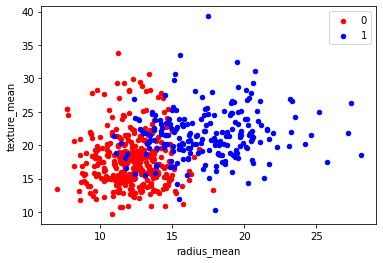

In [23]:
from matplotlib import pyplot as plt 
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='radius_mean', y='texture_mean', label=key
               ,color=colors[key])
plt.show()

# Histogram Analizi
Kötü huylu kanser hücrelerinin işgal ettiği alan, iyi huylu kanser hücrelerininkinden daha büyüktür.

In [24]:
px.histogram(data_frame=df,x=df.concavity_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

<a id="5"></a>
## Korelasyon Analizi

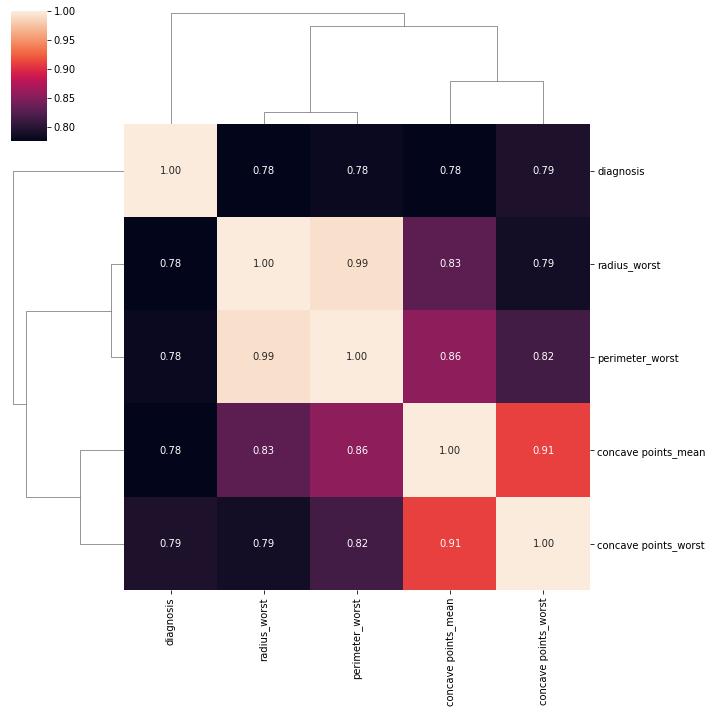

In [25]:
corr_matrix = df.corr() #datada numerik degerler arasındakı coralasyona bakacak
threshold = 0.75 #sınırımız
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")

<a id="6"></a>
## Pair Plot Gösterimi

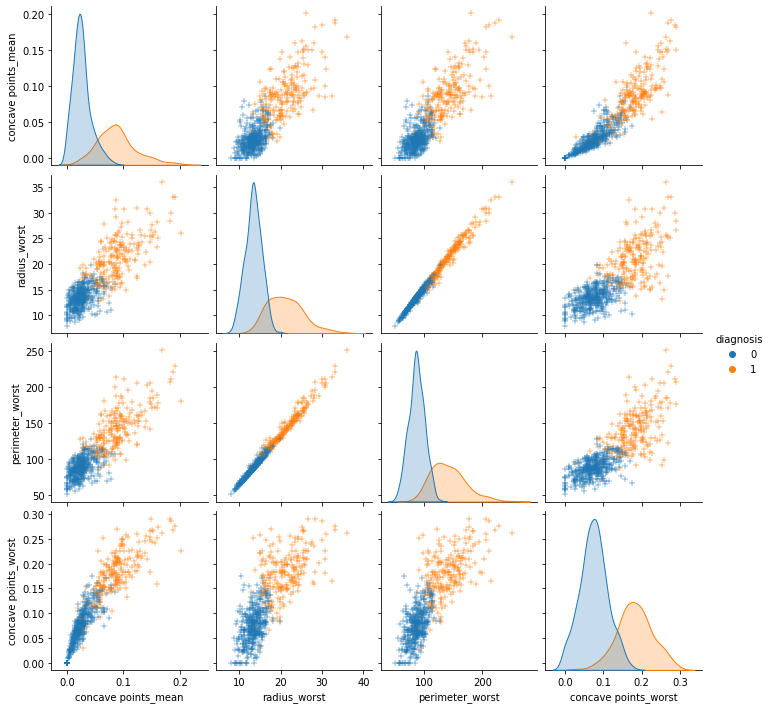

In [26]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+",hue = "diagnosis") #hıstogram olarak goster
            #yukarıdakı 75i alır       #gorselın turu     #noktalar     #classlarımız
plt.show()

<a id="8"></a>
## Ön işleme: Tren-Test Ayırma ve Normalizasyon

In [27]:
X = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

In [28]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [30]:
# train test split
from sklearn.model_selection  import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (398, 30)
X_test (171, 30)
y_train (398,)
y_test (171,)


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
#değerlerin 0 - 1 arasına taşınması için MinMaxScaler normalizasyon kullanıldı
mm = preprocessing.MinMaxScaler()

In [32]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [33]:
X_train

array([[0.22425192, 0.84947589, 0.20950754, ..., 0.        , 0.16637098,
        0.08126722],
       [0.2031931 , 0.3870021 , 0.19591517, ..., 0.23756014, 0.19120836,
        0.16325594],
       [0.60722856, 0.5932914 , 0.61713635, ..., 0.66082474, 0.34082397,
        0.26006821],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

 <a id="9"></a>
 # MODELLER
 1. Gaussian Naive Bayes
 2. Bernoulli Naive Bayes
 3. Lojistik Regresyon
 4. KNN Classification
 5. Yapay Sinir Ağları
 6. Karar Ağaçları
 7. Rastgele Orman Sınıflandırması
 


## 1. Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes0=time()

In [35]:
 gaussianNaiveBayes.fit(X_train, y_train.ravel())   

GaussianNB()

In [36]:
gaussianNaiveBayes_time=time()-gaussianNaiveBayes0
print("gaussian naive bayes time:", gaussianNaiveBayes_time)


gaussian naive bayes time: 0.02356863021850586


In [37]:
prediction1 = gaussianNaiveBayes.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_gaussianNaiveBayes = accuracy_score(y_test, prediction1)
accuracy_gaussianNaiveBayes

0.9415204678362573

In [39]:
accuracy_gaussianNaiveBayes_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_gaussianNaiveBayes_cv

0.9356209150326797

In [40]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


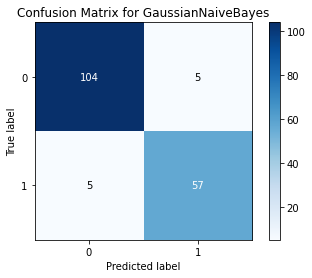

In [41]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, prediction1, normalize=False, title = 'Confusion Matrix for GaussianNaiveBayes')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



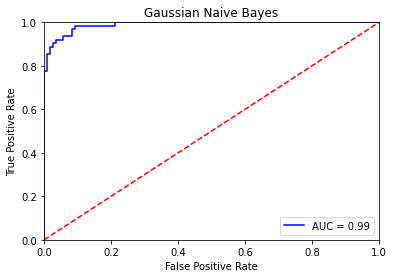

In [43]:
#ROC EĞRİSİ - Gaussian Naive Bayes 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
prediction1 = gaussianNaiveBayes.predict_proba(X_test)
prediction1= prediction1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Gaussian Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2.Bernoulli Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
bernoulliNaiveBayes = BernoulliNB(binarize= 0.0)
bernoulliNaiveBayes0=time()

In [45]:
bernoulliNaiveBayes.fit(X_train, y_train.ravel())
bernoulliNaiveBayes_time=time()-bernoulliNaiveBayes0
print("bernoulli naive bayes time:", bernoulliNaiveBayes_time)


bernoulli naive bayes time: 0.014840841293334961


In [46]:
bernollitahmin = bernoulliNaiveBayes.predict(X_test)

In [47]:
Accuracy_bnb = accuracy_score(y_test, bernollitahmin)
Accuracy_bnb 

0.6374269005847953

In [48]:
accuracy_BernoulliNaiveBayes_cv = cross_val_score (bernoulliNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_BernoulliNaiveBayes_cv

0.6316993464052287

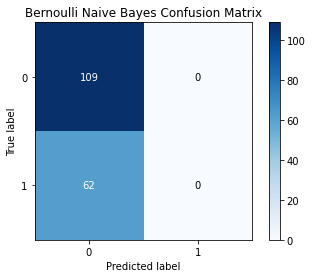

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, bernollitahmin, normalize=False, title = 'Bernoulli Naive Bayes Confusion Matrix')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bernollitahmin))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       109
           1       0.00      0.00      0.00        62

    accuracy                           0.64       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.41      0.64      0.50       171



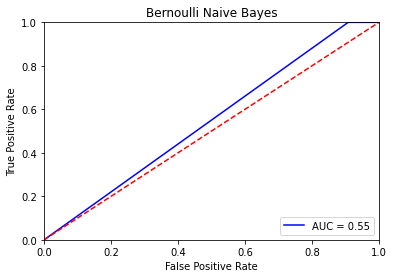

In [51]:
#Bernolli Naive Bayes ROC eğrisi
bernollitahmin = bernoulliNaiveBayes.predict_proba(X_test)
bernollitahmin= bernollitahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, bernollitahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Bernoulli Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg =  LogisticRegression(solver='lbfgs', max_iter=3000)
logreg0=time()
logreg.fit(X_train, y_train.ravel())
logreg_time=time()-logreg0
print("lojistik regresyon time:", logreg_time)


lojistik regresyon time: 0.02046966552734375


In [53]:
logtahmin = logreg.predict(X_test)
Accuracy_logreg = accuracy_score(y_test, logtahmin)
Accuracy_logreg


0.9766081871345029

In [54]:
Accuracy_logreg_cv = cross_val_score (logreg, X_test, y_test, cv = 10).mean()
Accuracy_logreg_cv

0.9415032679738562

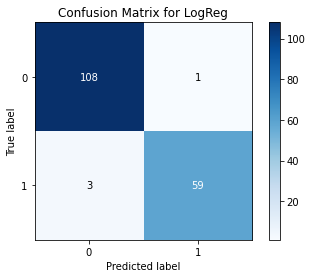

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, logtahmin, normalize=False, title = 'Confusion Matrix for LogReg')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logtahmin))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



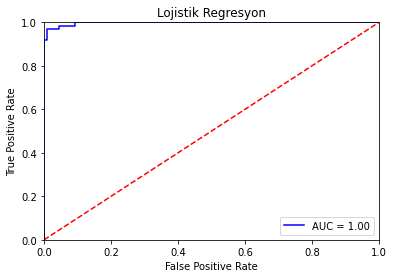

In [57]:
# ROC EĞRİSİ - LOGISTIC REGRESYON
logtahmin = logreg.predict_proba(X_test)
logtahmin= logtahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, logtahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Lojistik Regresyon')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. KNN Classification

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn0=time()
knn.fit(X_train, y_train)
knn_time=time()-knn0
print("knn time:", knn_time)


knn time: 0.0009152889251708984


In [59]:
tahminknn = knn.predict(X_test)


In [60]:
accuracy_knn = accuracy_score(y_test, tahminknn)
accuracy_knn

0.9649122807017544

In [61]:
accuracy_knn_cv = cross_val_score (knn, X_test, y_test, cv = 10).mean()
accuracy_knn_cv

0.9647058823529411

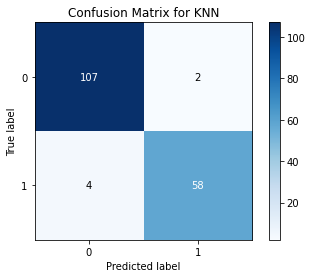

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, tahminknn, normalize=False, title = 'Confusion Matrix for KNN')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminknn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.94      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



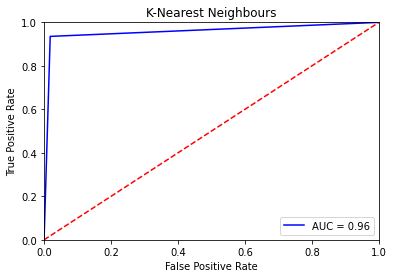

In [64]:
### ROC EĞRİSİ KNN 
knntahmin = knn.predict_proba(X_test)
knntahmin= knntahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminknn)
roc_auc = metrics.auc(fpr, tpr)


plt.title('K-Nearest Neighbours')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Yapay Sinir Ağları(Artificial Neural Network)

In [65]:
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred_ysa = mlpc.predict(X_test)
ysa_acc=accuracy_score(y_test, y_pred_ysa)
ysa_acc

0.9824561403508771

In [66]:
accuracy_ysa_cv = cross_val_score(mlpc, X_test, y_test, cv = 10).mean()
accuracy_ysa_cv

0.9415032679738562

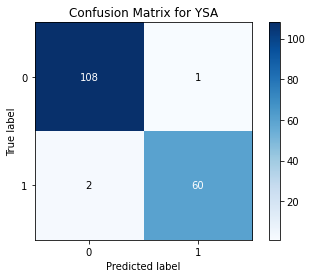

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ysa, normalize=False, title = 'Confusion Matrix for YSA')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ysa))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.98      0.97      0.98        62

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



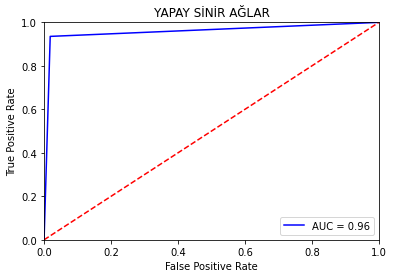

In [69]:
# calculate the fpr and tpr for all thresholds of the classification
y_pred_ysa = mlpc.predict_proba(X_test)
y_pred_ysa= y_pred_ysa[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminknn)
roc_auc = metrics.auc(fpr, tpr)


plt.title('YAPAY SİNİR AĞLAR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Karar Ağaçları

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
modeldt= (DecisionTreeClassifier(max_depth =3))
dt0=time()

In [71]:
modeldt.fit(X_train, y_train.ravel())
dt_time=time()-dt0
tahmindt = modeldt.predict(X_test) #prediction

accuracy_dt = accuracy_score(y_test, tahmindt)
accuracy_dt

0.9473684210526315

In [72]:
accuracy_dt_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_dt_cv

0.9356209150326797

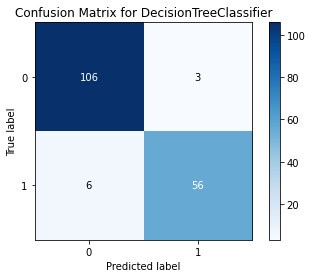

In [73]:
skplt.metrics.plot_confusion_matrix(y_test, tahmindt, normalize=False, title = 'Confusion Matrix for DecisionTreeClassifier')

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmindt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.95      0.90      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



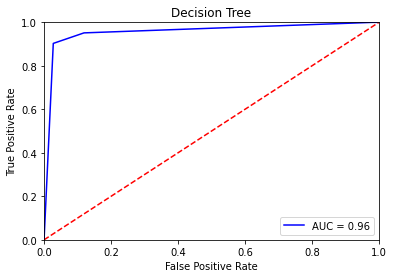

In [75]:
#Karar AğaçlarıRoc Eğrisi
tahmindt = modeldt.predict_proba(X_test)
tahmindt= tahmindt[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahmindt)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="10"></a>
## Karar Ağaçları Görselleştirme

In [76]:
from sklearn import tree
text_representation = tree.export_text(modeldt)

In [77]:
dt_clf = modeldt

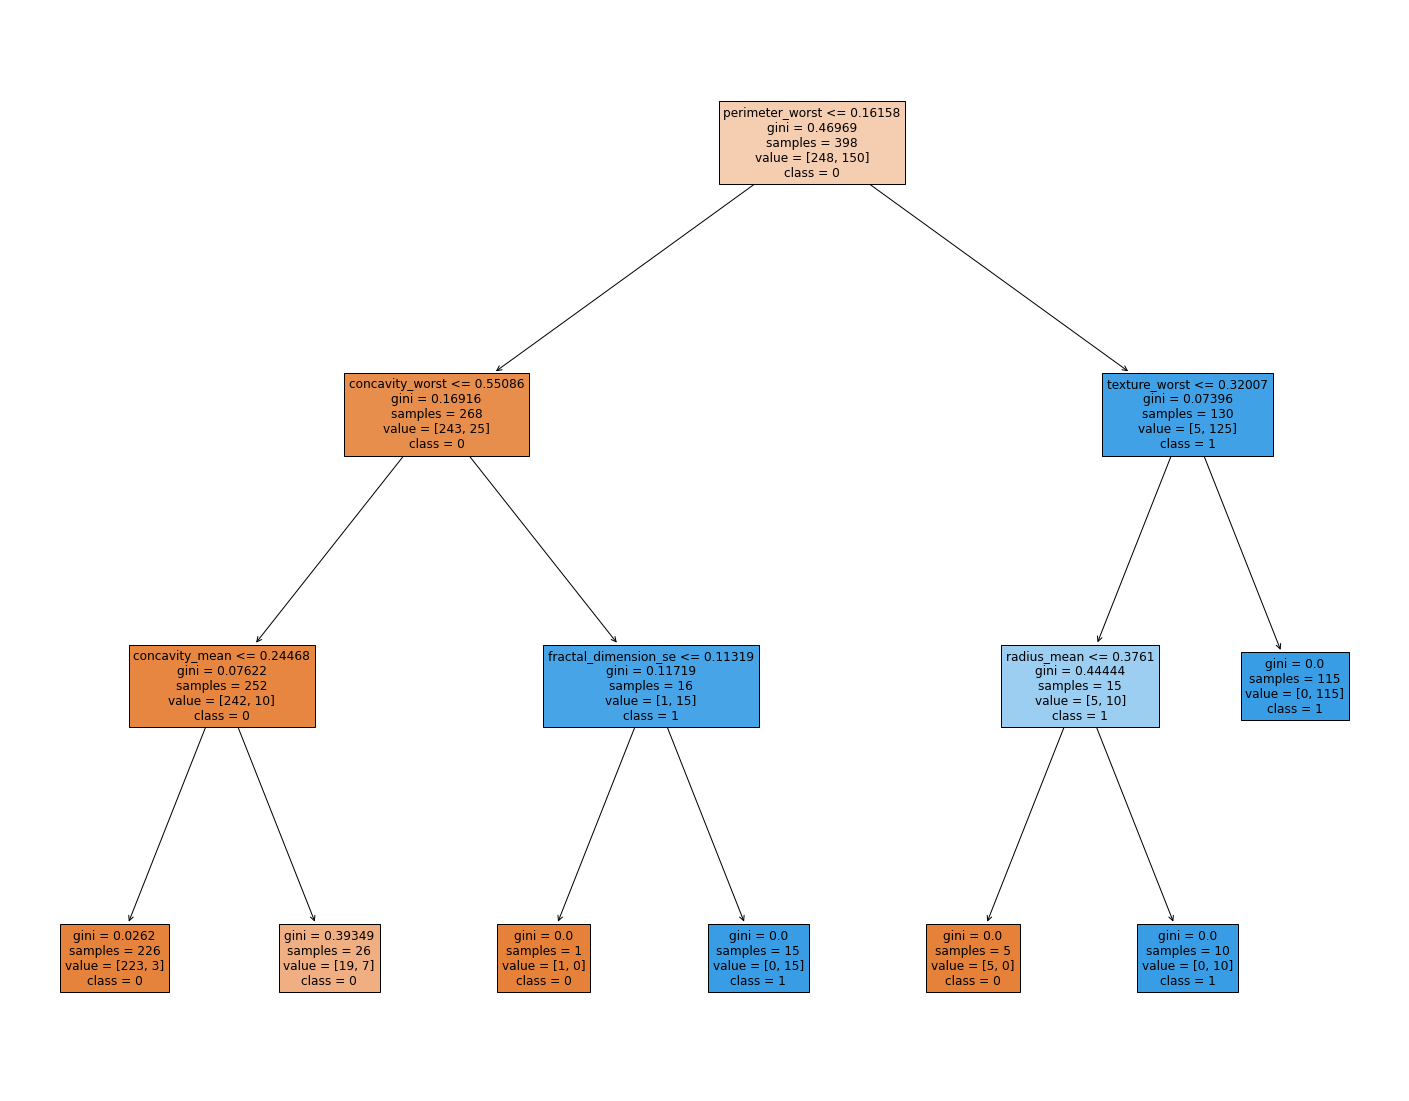

In [78]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
              feature_names = df.columns.tolist()[:-1],
              class_names = ["0","1"],
              filled = True,
              precision = 5
              )
plt.show()

# 6. Rastgele Orman Sınıflandırması

In [79]:
modelrf = RandomForestClassifier(n_estimators=3)
rf0=time()

In [80]:
modelrf.fit(X_train, y_train.ravel())
rf_time=time()-rf0
print("random forest time:", rf_time)
tahminrf= modelrf.predict(X_test)
accuracy_rf = accuracy_score(y_test, tahminrf)
accuracy_rf

random forest time: 0.05857586860656738


0.9473684210526315

In [81]:
accuracy_rf_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_rf_cv

0.9356209150326797

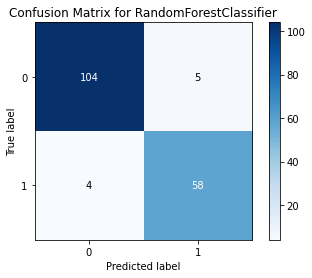

In [82]:
skplt.metrics.plot_confusion_matrix(y_test, tahminrf, normalize=False, title = 'Confusion Matrix for RandomForestClassifier')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminrf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



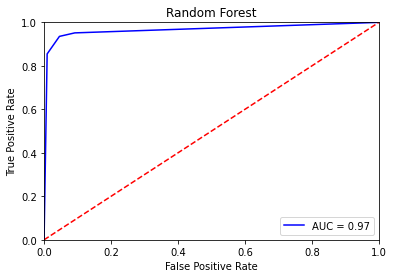

In [84]:
# calculate the fpr and tpr for all thresholds of the classification
tahminrf = modelrf.predict_proba(X_test)
tahminrf= tahminrf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminrf)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ALGORİTMALARIN ACCURACY DEĞERLERİNİN KARŞILAŞTIRMASI

In [85]:
modeller = [
    gaussianNaiveBayes,
    bernoulliNaiveBayes, 
    logreg,
    knn,
    mlpc,
    modeldt,
    modelrf
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GaussianNB:
Accuracy: 94.1520%
----------------------------
BernoulliNB:
Accuracy: 63.7427%
----------------------------
LogisticRegression:
Accuracy: 97.6608%
----------------------------
KNeighborsClassifier:
Accuracy: 96.4912%
----------------------------
MLPClassifier:
Accuracy: 98.2456%
----------------------------
DecisionTreeClassifier:
Accuracy: 94.7368%
----------------------------
RandomForestClassifier:
Accuracy: 94.7368%


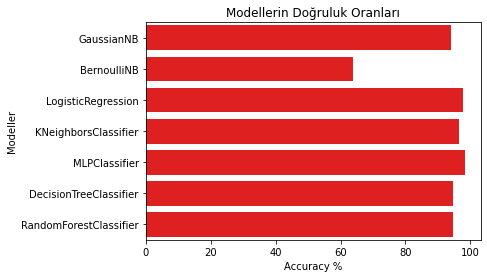

In [86]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları'); 

# Algoritmaların Çalışma Zamanı Karşılaştırılması

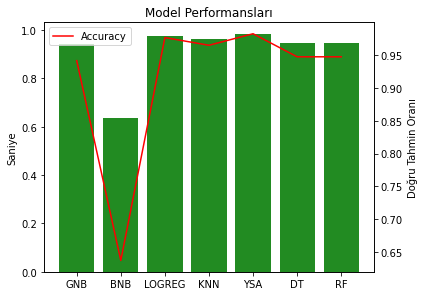

In [87]:
fig, ax1 = plt.subplots()
objects = ['GNB', 'BNB','LOGREG','KNN','YSA','DT','RF',]
y_pos = np.arange(len(objects))
performance_acc = [accuracy_gaussianNaiveBayes, Accuracy_bnb, Accuracy_logreg,accuracy_knn,ysa_acc,accuracy_dt,accuracy_rf]
performance_time = [accuracy_gaussianNaiveBayes, Accuracy_bnb, Accuracy_logreg,accuracy_knn,ysa_acc,accuracy_dt,accuracy_rf]
ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='forestgreen')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Doğru Tahmin Oranı') 
ax2.plot(y_pos, performance_acc, color='red')
plt.xticks(y_pos, objects)
fig.tight_layout() 
plt.title('Model Performansları')
plt.legend(['Accuracy'], loc='upper left')
plt.show()